## Problem Set #4


#### 1. Selecting a Dataset : Spotify Tracks Dataset - Kaggle
#### 2. Choose an Algorithm : Decision Tree and Collaborative Filtering

I selected the Spotify Tracks Dataset, which is a dataset of Spotify tracks over a range of 125 different genres and their audio features. My goal is to classify songs based on features into genres. I want the model to classify the songs based on genres. 

SOURCE: Spotify

COLLECTION METHODOLOGY: The data was collected and cleaned using Spotifys Web API and Python. 

YEAR COLLECTED: 2022

FEATURES:
- track_id: The Spotify ID for the track
- artists: The artists names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: The album name in which the track appears
- track_name: Name of the track
- popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- duration_ms: The track length in milliseconds
explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- loudness: The overall loudness of a track in decibels (dB)
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness: Predicts whether a track contains no vocals. Ooh and aah sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- track_genre: The genre in which the track belongs

There are several machine learning algorithms that could potentially work well for predicting the genre of a song based on features. A decision tree could be used for classification as it will recursively split the data based on the most informative features. It is scalable, non-parametric and robust. It is also easy to interpret. Hence I will be using decision tree first. Random forest could improve the accuracy and time to predict. I might experiment with multiple algorithms and compare their performance to find the best algorithm for this dataset.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


spotify_df=pd.read_csv("dataset.csv")
spotify_df.head()

ModuleNotFoundError: No module named 'numpy'

In [ ]:
#cleaning data

print(spotify_df.describe())
spotify_df = spotify_df.drop("Unnamed: 0", axis=1) ##removing the unnamed column as it just the index
#print(spotify_df.head())
print(spotify_df.isna().sum()) #check for null values
spotify_df.dropna(inplace=True) #remove null values
#spotify_df.isna().sum()
spotify_df.drop_duplicates(inplace=True)
print(spotify_df.info())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

In [ ]:
#Using decision tree
X = spotify_df.drop(columns = ["track_id", "artists", "album_name", "track_name", "track_genre"]) 
#dropping columns that I believe would not affect the genre
y = spotify_df["track_genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy of the decision tree: {:.2f}%".format(score*100))
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy of the decision tree: 20.71%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%


#### Tinkering with the parameters

Index(['popularity', 'acousticness', 'duration_ms', 'danceability', 'valence',
       'tempo', 'speechiness', 'loudness', 'energy', 'liveness'],
      dtype='object')
Accuracy of the decision tree with top 10 features: 19.44%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%
Accuracy of the decision tree after scaling: 20.65%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%
Accuracy of the decision tree with RobustScaler: 21.11%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%
Checking for class imbalance
acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
               ... 
honky-tonk      981
dance           965
german          963
classical       933
romance         904
Name: track_genre, Length: 114, dtype: int64


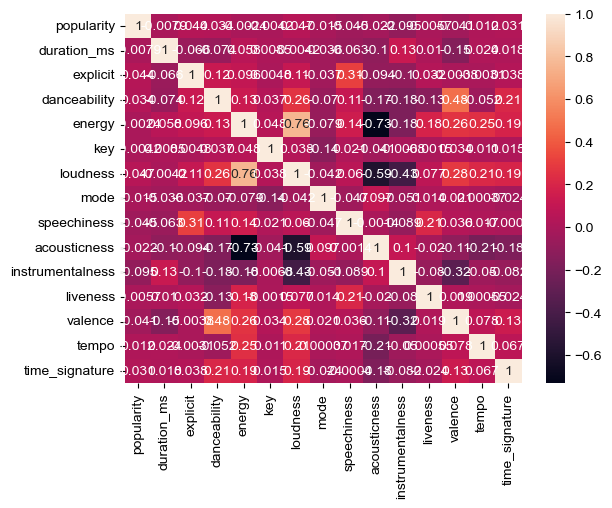

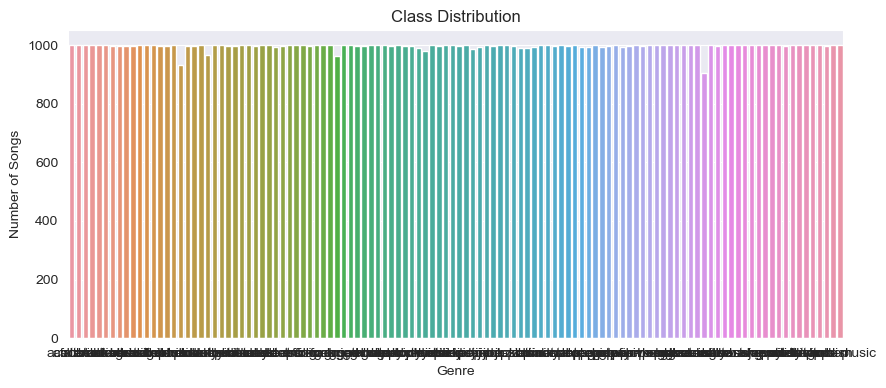

Accuracy of the decision tree after pruning: 23.61%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%
Converting 'explicit' feature's datatype to float
Accuracy of the decision tree after data type transformation: 24.00%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%


In [ ]:
#The accuracy is too low, checking which features have high correlation and trying to use those features only
# Correlation Analysis
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)

# Feature Importance Ranking
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

selected_features = X.columns[indices[:10]] # Selecting top 10 features
print(selected_features)
X_train_fs = X_train.loc[:, selected_features]
X_test_fs = X_test.loc[:, selected_features]

# Train and evaluate the decision tree classifier with top 10 features
model_fs = DecisionTreeClassifier()
model_fs.fit(X_train_fs, y_train)
predictions_fs = model_fs.predict(X_test_fs)
score_fs = accuracy_score(y_test, predictions_fs)

print("Accuracy of the decision tree with top 10 features: {:.2f}%".format(score_fs*100))
precision_fs = precision_score(y_test, predictions, average='weighted')
recall_fs = recall_score(y_test, predictions, average='weighted')
f1_fs = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

#this performs poorly, I'll try scaling the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score_ss = accuracy_score(y_test, predictions)
print("Accuracy of the decision tree after scaling: {:.2f}%".format(score_ss*100))
precision_ss = precision_score(y_test, predictions, average='weighted')
recall_ss = recall_score(y_test, predictions, average='weighted')
f1_ss = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

#with robust scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score_rs = accuracy_score(y_test, predictions)

# print the accuracy score
print("Accuracy of the decision tree with RobustScaler: {:.2f}%".format(score_rs*100))
precision_rs = precision_score(y_test, predictions, average='weighted')
recall_rs = recall_score(y_test, predictions, average='weighted')
f1_rs = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))


#checking for class imbalance 
print("Checking for class imbalance")
class_counts = spotify_df['track_genre'].value_counts()
print(class_counts)
# plotting the distribution using seaborn
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(10,4))
sns.countplot(data= spotify_df, x="track_genre")
plt.title('Class Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.show()
#there is no class imbalance, trying pruning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trying pruning 
model = DecisionTreeClassifier(min_samples_split=100, max_depth=12, max_features=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score_pruned = accuracy_score(y_test, predictions)
print("Accuracy of the decision tree after pruning: {:.2f}%".format(score_pruned*100))
precision_pruned = precision_score(y_test, predictions, average='weighted',zero_division=1)
recall_pruned = recall_score(y_test, predictions, average='weighted')
f1_pruned = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

#Converting boolean values to float
print("Converting 'explicit' feature's datatype to float")
X = spotify_df.drop(columns = ["track_id", "artists", "album_name", "track_name", "track_genre"])
y = spotify_df["track_genre"]

for x in X.index:
    if X.loc[x, "explicit"] == "False" :
        X.loc[x, "explicit"] = 0
    elif X.loc[x, "explicit"] == "True" :
        X.loc[x, "explicit"] = 1
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = DecisionTreeClassifier(min_samples_split=50, max_depth=15, max_features=6)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score_trans = accuracy_score(y_test, predictions)
print("Accuracy of the decision tree after data type transformation: {:.2f}%".format(score_trans*100))
precision_trans = precision_score(y_test, predictions, average='weighted')
recall_trans = recall_score(y_test, predictions, average='weighted')
f1_trans = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))


In [ ]:
#Using random forests instead
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = spotify_df.drop(columns=["track_id", "artists", "album_name", "track_name", "track_genre"])
y = spotify_df["track_genre"]

for x in X.index:
    if X.loc[x, "explicit"] == "False" :
        X.loc[x, "explicit"] = 0
    elif X.loc[x, "explicit"] == "True" :
        X.loc[x, "explicit"] = 1       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score_rf = accuracy_score(y_test, predictions)
print("Accuracy of Random Forests: {:.2f}%".format(score_rf*100))
precision_rf = precision_score(y_test, predictions, average='weighted')
recall_rf = recall_score(y_test, predictions, average='weighted')
f1_rf = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

#tinkering
X = spotify_df[['popularity', 'duration_ms', 'acousticness', 'danceability', 'valence', 'speechiness', 'tempo', 'loudness', 'energy', 'liveness']]
y = spotify_df["track_genre"]      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(random_state =  30, n_estimators = 300, verbose=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score_trf = accuracy_score(y_test, predictions)
print("Accuracy of Random Forests updated: {:.2f}%".format(score_trf*100))
precision_trf = precision_score(y_test, predictions, average='weighted')
recall_trf = recall_score(y_test, predictions, average='weighted')
f1_trf = f1_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))


Accuracy of Random Forests: 32.08%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    9.2s finished


Accuracy of Random Forests updated: 30.78%
Precision: 21.23%
Recall: 20.71%
F1-score: 20.83%


#### Visualizations to demonstrate my findings. 



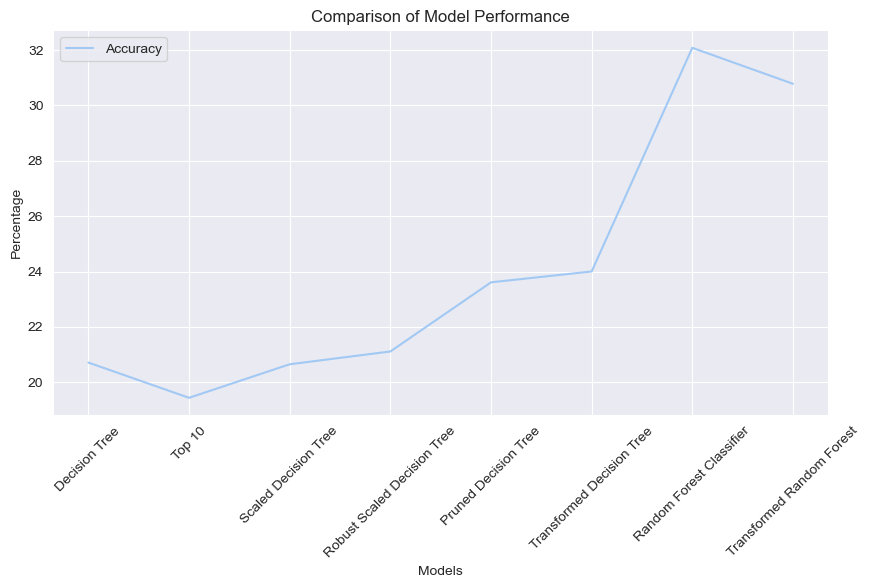

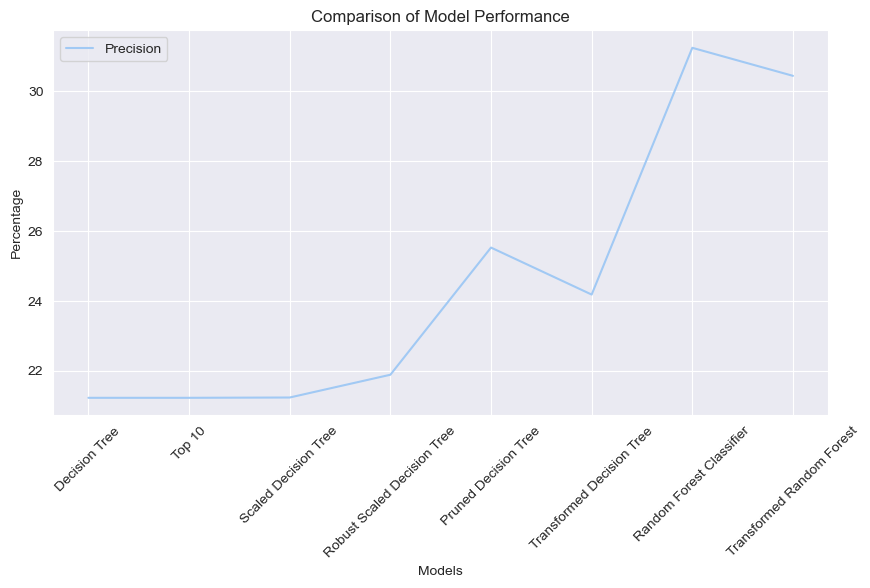

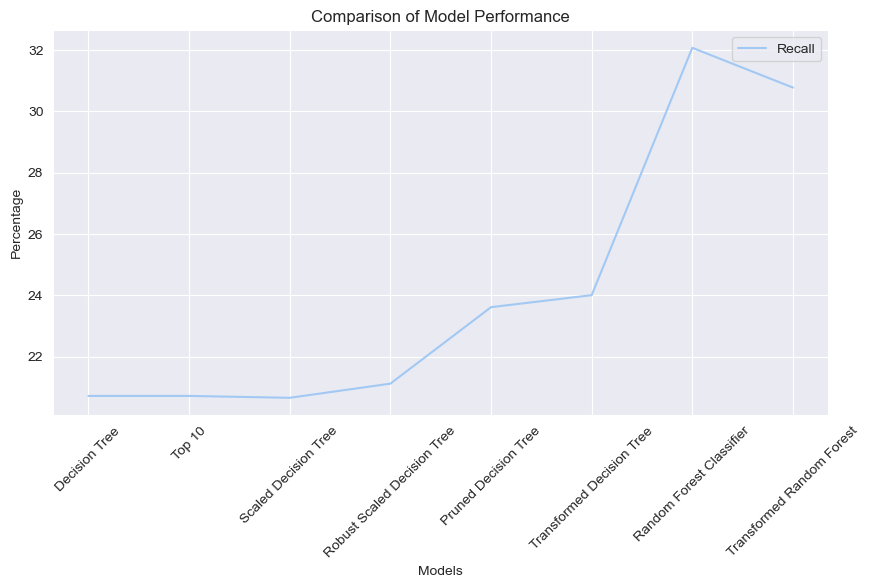

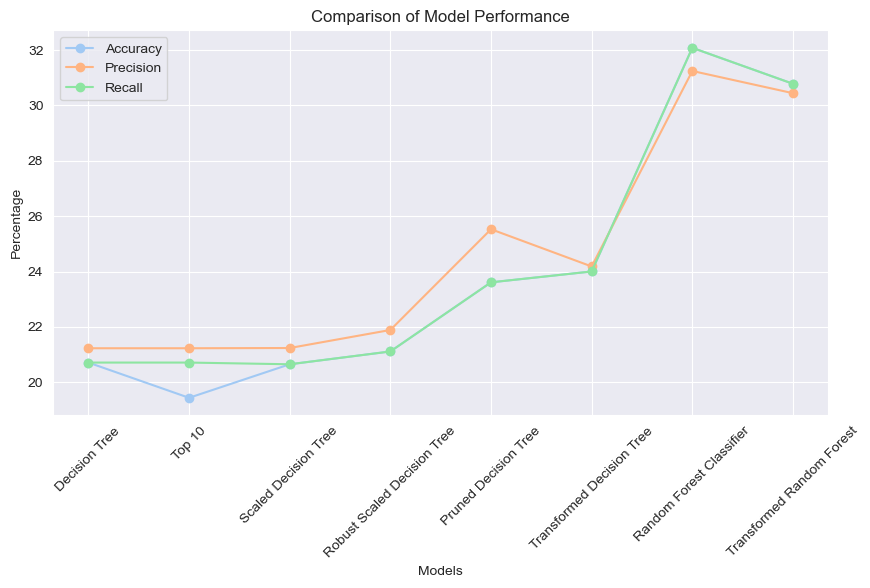

In [ ]:
def plot_metric(metric_scores, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(models, metric_scores, label=metric_name)
    ax.set_xlabel('Models')
    ax.set_ylabel('Percentage')
    ax.set_title('Comparison of Model Performance')
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

models = ['Decision Tree', 'Top 10', 'Scaled Decision Tree', 'Robust Scaled Decision Tree', 'Pruned Decision Tree', 'Transformed Decision Tree', 'Random Forest Classifier', 'Transformed Random Forest']
accuracies = [score*100, score_fs*100, score_ss*100, score_rs*100, score_pruned*100, score_trans*100, score_rf*100, score_trf*100]
precisions = [precision*100,precision_fs*100, precision_ss*100, precision_rs*100, precision_pruned*100, precision_trans*100, precision_rf*100, precision_trf*100]
recalls = [recall*100, recall_fs*100, recall_ss*100, recall_rs*100, recall_pruned*100, recall_trans*100, recall_rf*100,recall_trf*100]

plot_metric(accuracies, 'Accuracy')
plot_metric(precisions, 'Precision')
plot_metric(recalls, 'Recall')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(models, accuracies, label='Accuracy', marker='o')
ax.plot(models, precisions, label='Precision', marker='o')
ax.plot(models, recalls, label='Recall', marker='o')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Model Performance')
ax.legend()
plt.xticks(rotation=45)
plt.show()



The accuracy of my model using decision tree was very low. I tried to improve it using various techniques, but it did not increase significantly. Even using random forest did not affect it much. I think there could be multiple reasons why this could have happened. 

- Poor data quality: The data I was using to train your models may be of poor quality, with outliers, or errors that are affecting the performance of my models.

- Inappropriate feature selection: The features I have selected to train my models may not be relevant or informative enough to accurately predict the target variable.

- Hyperparameters tuning: Decision tree and random forest models are sensitive to hyperparameters, such as the number of trees, depth of the tree, and the number of features used in each tree. It is possible that I just needed to adjust the hyperparameters further to get better performance.

- Overfitting: Overfitting could have oocured when my model was too complex and it memorized the training data instead of learning the underlying patterns. 

I would overcome these challenges by:

- Poor data quality: I could first identify the sources of poor data quality and take steps to address them. This could involve removing outliers, correcting errors, or imputing missing values. I could also explore alternative data sources or collect more data to improve the overall quality of my dataset.

- Inappropriate feature selection: To address this issue, I could explore alternative feature selection methods, such as recursive feature elimination, principal component analysis, or correlation analysis. I could also consult with domain experts to identify the most relevant features for my target variable.

- Hyperparameters tuning: To optimize hyperparameters, I could use techniques such as grid search, random search, or Bayesian optimization to identify the best combination of hyperparameters for my models. I could also use cross-validation to evaluate the performance of my models across different hyperparameter settings.

- Overfitting: To prevent overfitting, I could simplify my models by reducing their complexity or regularizing them. I could also use cross-validation to evaluate the generalization performance of my models and identify potential overfitting issues.
